![Alt text](dataset/netflix.png)

Netflix Dataset Analysis using Pandas 

This Netflix Dataset has information about the TV Shows 
and Movies available on Netflix till 2021.

This dataset is collected from Flixable which is a third-party 
Netflix search engine, and available on Kaggle website for free.



In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
nf=pd.read_csv('dataset/Netflix.csv')

In [4]:
nf.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


### Q1. To show top-5 records of the dataset?

In [ ]:
nf.head()

### Q2. To show bottom-5 records of dataset?

In [ ]:
nf.tail()

### Q3. To show the No. of Rows and Columns?

In [ ]:
print('No of rows=',nf.shape[0],'\nNo of Columns=',nf.shape[1])

### Q4. To show each Column Name?

In [ ]:
print('The columns are=\n',nf.columns)

### Q5. To show the data-type of each column?

In [56]:
nf.dtypes

Show_Id          object
Category         object
Title            object
Director         object
Cast             object
Country          object
Release_Date     object
Rating           object
Duration         object
Type             object
Description      object
Minutes          object
Unit             object
Year            float64
dtype: object

### Q6. To show indexes, columns, data-types of each column, memory at once?

In [57]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Show_Id       7789 non-null   object 
 1   Category      7789 non-null   object 
 2   Title         7789 non-null   object 
 3   Director      5401 non-null   object 
 4   Cast          7071 non-null   object 
 5   Country       7282 non-null   object 
 6   Release_Date  7779 non-null   object 
 7   Rating        7782 non-null   object 
 8   Duration      7789 non-null   object 
 9   Type          7789 non-null   object 
 10  Description   7789 non-null   object 
 11  Minutes       7789 non-null   object 
 12  Unit          7789 non-null   object 
 13  Year          7691 non-null   float64
dtypes: float64(1), object(13)
memory usage: 852.1+ KB


### Q7. Is there any Duplicate Record in this dataset ? If yes, then remove the duplicate records.

In [63]:
print('No of Duplicates Found =',nf.duplicated().sum())# Inplace=True use karne ke baad 
print('No of Record after drop duplicates =',nf.drop_duplicates().shape[0])

No of Duplicates Found = 2
No of Record after drop duplicates = 7787


In [64]:
nf.shape[0]

7789

In [60]:
nf.duplicated().sum()
nf.drop_duplicates().shape[0]

7787

### Q8. Is there any Null Value present in any column ?

In [61]:
nf.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
Minutes            0
Unit               0
Year              98
dtype: int64

### Q9. For 'House of Cards', what is the Show Id and Who is the Director of this show ?

In [25]:
a=nf[nf['Title']=='House of Cards']
a

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Minutes,Unit,Year
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...,6,Seasons,2018.0


In [24]:
a=nf[nf['Title']=='House of Cards']
print('show_id =', a['Show_Id'].values[0])
print('director =',a['Director'].values[0])

show_id = s2833
director = Robin Wright, David Fincher, Gerald McRaney, John David Coles, David Manson


### Q10.In which year highest number of the TV Shows & Movies were released ? Show with Bar Graph.

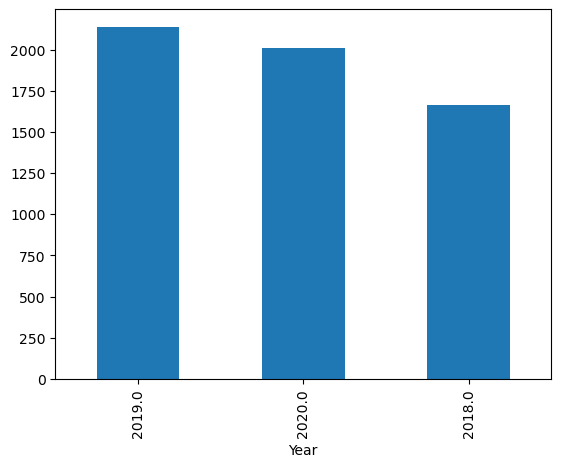

In [17]:
nf['Year']=pd.to_datetime(nf['Release_Date'], errors='coerce').dt.year
nf['Year'].value_counts().head(3).plot(kind='bar')
plt.show()

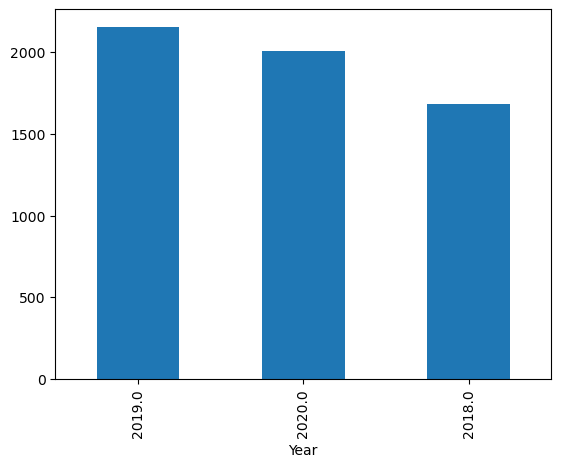

In [19]:
nf['Year']=pd.to_datetime(nf['Release_Date'],format='mixed').dt.year 
nf['Year'].value_counts().head(3).plot(kind='bar')
plt.show()


### Q11. How many Movies & TV Shows are in the dataset ? Show with Bar Graph.

Category
Movie      5379
TV Show    2410
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

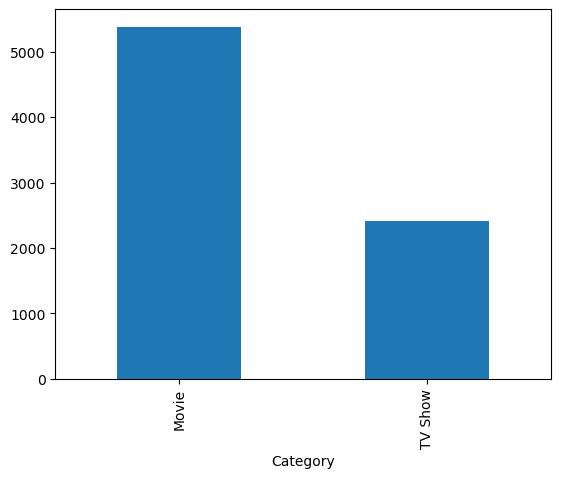

In [20]:
a=nf['Category'].value_counts()
print(a)
a.plot(kind='bar')
plt.show


### Q12. Show all the Movies that were released in year 2000?

In [21]:
nf[(nf['Year']==2020) & (nf['Category']=='Movie')].shape[0]

1313

In [22]:
#nf['Year']=pd.to_datetime(nf['Release_Date'], errors='coerce').dt.year
nf.loc[(nf['Year']==2020) & (nf['Category']=='Movie'),['Title','Year']]


,Title,Year
4,21,2020.0
6,122,2020.0
14,3022,2020.0
27,#Alive,2020.0
28,#AnneFrank - Parallel Stories,2020.0
...,...,...
7762,Zaki Chan,2020.0
7783,Zoom,2020.0
7784,Zozo,2020.0
7786,Zulu Man in Japan,2020.0


### Q13. Show only the Titles of all TV Shows that were released in India only?

In [23]:
nf.loc[(nf['Country'] =='India') & (nf['Category']=='TV Show'),['Title','Country']]

,Title,Country
86,21 Sarfarosh: Saragarhi 1897,India
132,7 (Seven),India
340,Agent Raghav,India
364,Akbar Birbal,India
533,Anjaan: Rural Myths,India
...,...,...
6249,The Creative Indians,India
6400,The Golden Years with Javed Akhtar,India
6469,The House That Made Me,India
7294,Typewriter,India


### Q14. Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?

In [ ]:
nf['Director'].value_counts().head(10)

### Q15.  Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom" ?

In [ ]:
nf[(nf['Category']=='Movie') & (nf['Type']=='Comedies') | (nf['Country']=='United Kingdom')].head()

### Q16. In how many movies/shows, Tom Cruise was cast ?

In [ ]:
nf[nf['Cast']=='Tom Cruise']


In [ ]:
nf[nf.Cast.str.contains('Tom Cruise',na=False)]

### Q17. What are the different Ratings defined by Netflix ?

In [ ]:
nf['Rating'].unique()

### Q18. How many Movies got the 'TV-14' rating, in Canada ?

In [52]:
nf[(nf['Rating']=='TV-14') & (nf['Country']=='Canada') & (nf['Category']=='Movie')].shape[0]

11

### Q19. How many TV Show got the 'R' rating, after year 2018 ?

In [53]:
nf['Year'] = pd.to_datetime(nf['Release_Date'], errors='coerce').dt.year
nf[(nf['Category'] == 'TV Show') & (nf['Rating'] == 'R') &  (nf['Year'] > 2018)]


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Minutes,Unit,Year
6437,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",NaN,"April 25, 2019",R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,1,Season,2019.0


### Q20. What is the maximum duration of a Movie/Show on Netflix ?

In [11]:
nf.Duration.dtypes

dtype('O')

In [12]:
nf[['Minutes','Unit']]=nf['Duration'].str.split(' ',expand=True)

In [13]:
nf.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Minutes,Unit
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4,Seasons
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93,min


In [54]:
nf.Minutes.astype(int).max()

312

In [55]:
nf.Minutes.astype(int).min()

1

In [39]:
max_duration = nf['Duration'].apply(lambda x: int(x.split()[0]) if 'min' in x else 0).max()
max_duration


312

In [40]:
# Extract the numeric part of durations that include 'min' and convert to integers
durations = [int(duration.split()[0]) for duration in nf['Duration'] if 'min' in duration]
max_duration = max(durations, default=0)


### Q21. Which individual country has the Highest No. of TV Shows ?

In [41]:
nf[nf['Category']=='TV Show'].count()

Show_Id         2410
Category        2410
Title           2410
Director         185
Cast            2118
Country         2133
Release_Date    2400
Rating          2408
Duration        2410
Type            2410
Description     2410
Minutes         2410
Unit            2410
Year            2400
dtype: int64

In [42]:
a=nf[nf['Category']=='TV Show']['Country']
a.count()

2133

In [43]:
a=nf[nf['Category']=='TV Show']['Country'].value_counts()
a.head(1)

Country
United States    705
Name: count, dtype: int64

In [46]:
a.sum()

2133

### Q22. How can we sort the dataset by Year ?

In [50]:
#nf['Year'] = pd.to_datetime(nf['Release_Date'], errors='coerce').dt.year
nf.sort_values(by='Year')

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Minutes,Unit,Year
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,"January 1, 2008",TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",81,min,2008.0
1765,s1766,TV Show,Dinner for Five,NaN,NaN,United States,"February 4, 2008",TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",1,Season,2008.0
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",29,min,2009.0
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,104,min,2009.0
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",84,min,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,2,Seasons,NaN
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",3,Seasons,NaN
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",4,Seasons,NaN
5138,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",13,Seasons,NaN


### Q23. Find all the instances where : Category is 'Movie' and Type is 'Dramas' or  Category is 'TV Show' & Type is 'Kids' TV' ?

In [51]:
nf[(nf['Category']=='Movie') & (nf['Type']=='Dramas') | (nf['Category']=='TV Show') & (nf['Type']=='Kids''TV')].head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Minutes,Unit,Year
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123,min,2020.0
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...,119,min,2019.0
170,s171,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States","December 15, 2019",R,110 min,Dramas,A ruthless corporate headhunter battles his ri...,110,min,2019.0
232,s233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,"October 1, 2011",TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr...",95,min,2011.0
295,s296,Movie,Across Grace Alley,Ralph Macchio,"Ben Hyland, Marsha Mason, Karina Smirnoff, Col...",United States,"December 1, 2016",TV-PG,24 min,Dramas,"A young boy, upset by his parents' divorce, be...",24,min,2016.0
